In [1]:
import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

In [2]:
# Data preprocessing
# 0 denotes no priors 
# le5 denotes greater than 0 but less than equal to 5 priors
# gt5 denotes greater than 5 priors 
file = open(r"Datasets/compas-scores.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

priors_0_ids = [int(id[x]) for x in range(len(id)) if int(priors_count[x]) == 0]
priors_0_races = [race[x-1] for x in priors_0_ids]
priors_0_scores = [score_text[x-1] for x in priors_0_ids]

priors_le5_ids = [int(id[x]) for x in range(len(id)) if int(priors_count[x]) > 0 and int(priors_count[x]) <= 5]
priors_le5_races = [race[x-1] for x in priors_le5_ids]
priors_le5_scores = [score_text[x-1] for x in priors_le5_ids]

priors_gt5_ids = [int(id[x]) for x in range(len(id)) if int(priors_count[x]) > 5]
priors_gt5_races = [race[x-1] for x in priors_gt5_ids]
priors_gt5_scores = [score_text[x-1] for x in priors_gt5_ids]

Null hypothesis (proposed distribution): [0.059218559218559216, 0.15262515262515264, 0.7881562881562881]

Proposed distribution rejected at alpha = 0.05. Kardis = 3.97915289214829e-71.
Any plausible distribution must boost probability over the given distribution by 1.25654885236153e+69, and will therefore have a minimum probability of 2.70021354266092e-9.
Closest plausible distribution: [0.13294571871393768, 0.2037906290591294, 0.663263652226933]


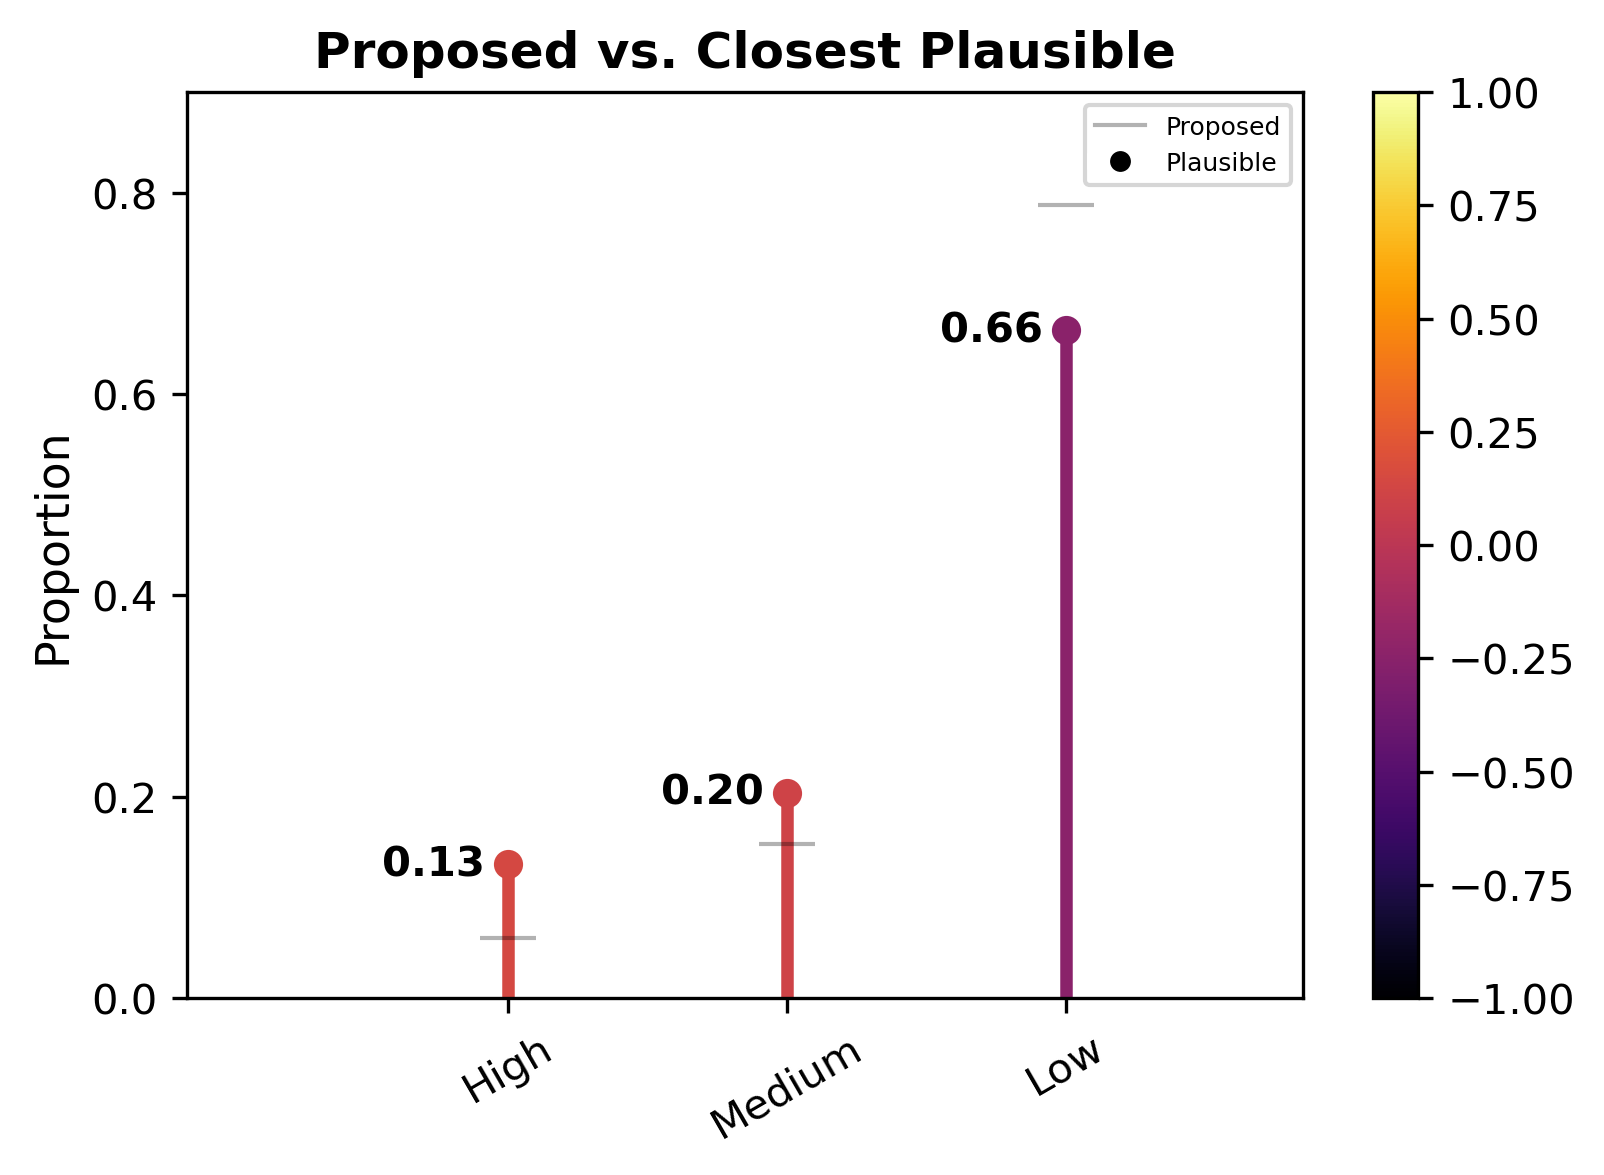

In [3]:
# 0 Priors Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_0_races,priors_0_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_0priors_white_dist.pdf")

Null hypothesis (proposed distribution): [0.09422175950026028, 0.23633524206142634, 0.6694429984383133]

Proposed distribution rejected at alpha = 0.05. Kardis = 2.60884932462533e-130.
Any plausible distribution must boost probability over the given distribution by 1.91655376675235e+128, and will therefore have a minimum probability of 1.10988524168025e-9.
Closest plausible distribution: [0.196903716776621, 0.2988258293389736, 0.5042704538844055]


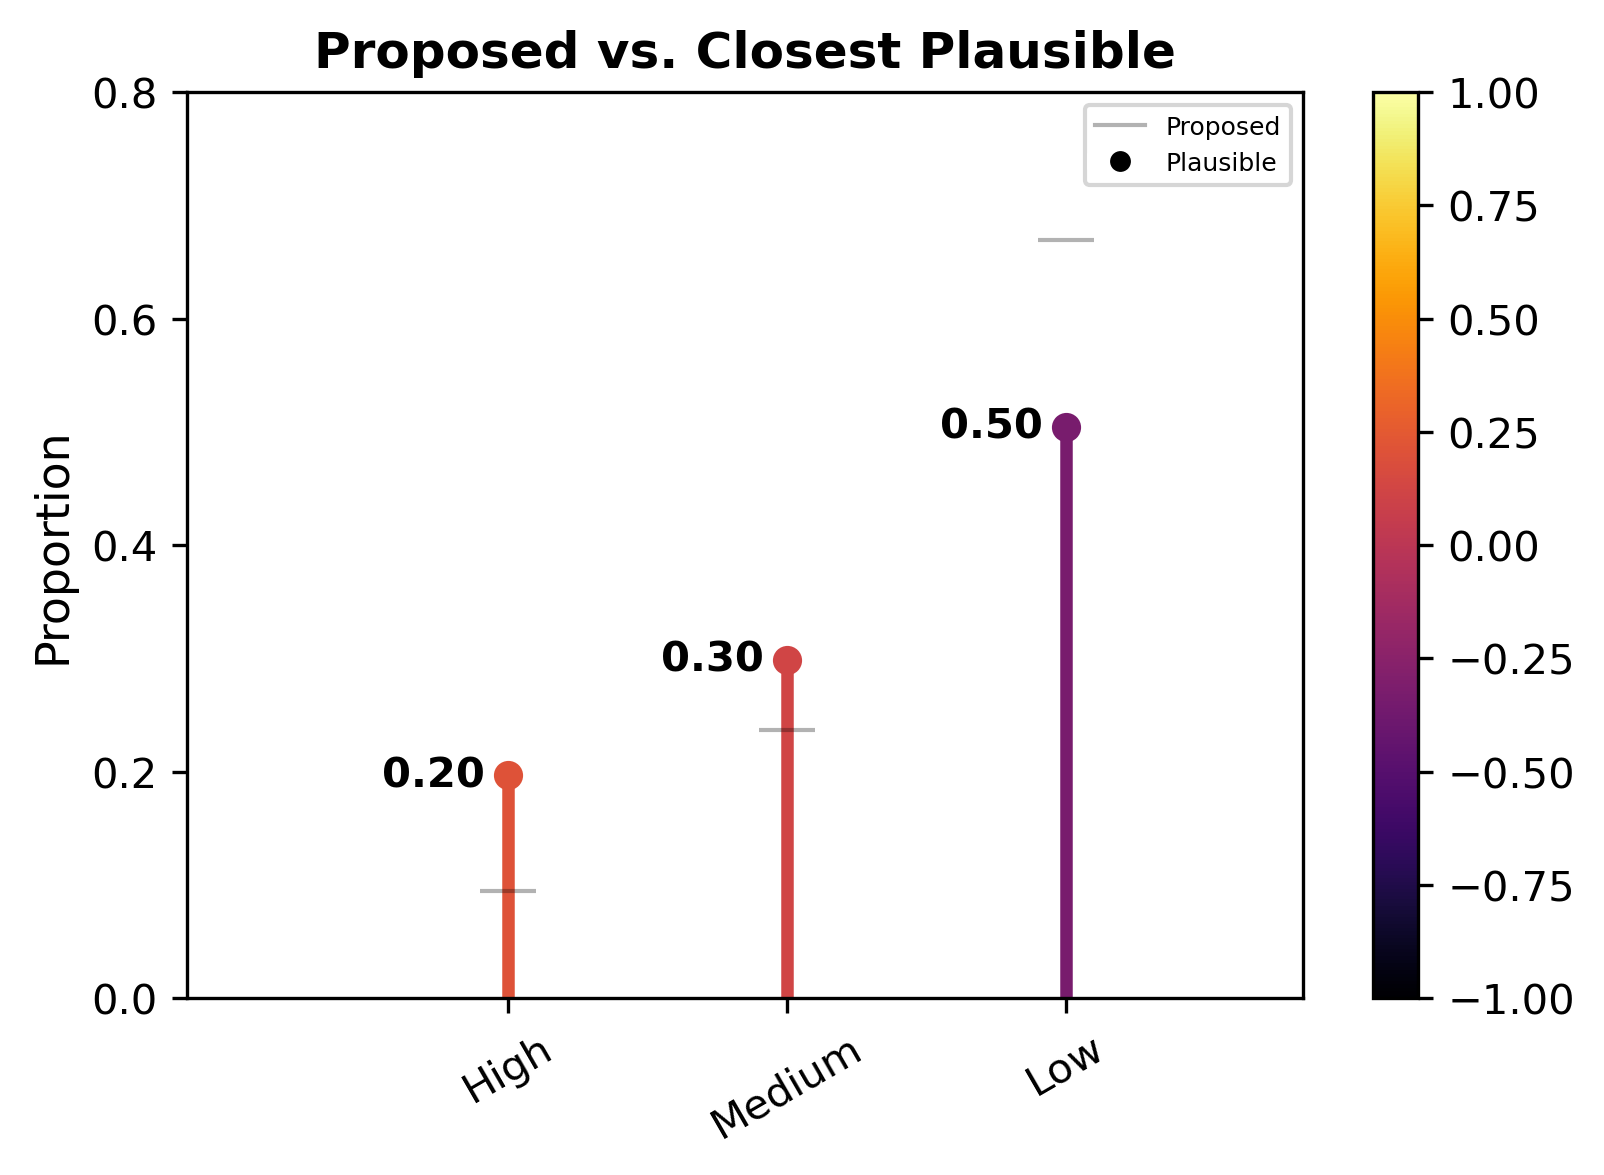

In [4]:
# <=5 Priors Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_le5_races,priors_le5_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_le5priors_white_dist.pdf")

Null hypothesis (proposed distribution): [0.305019305019305, 0.39575289575289574, 0.29922779922779924]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.59269868045921e-54.
Any plausible distribution must boost probability over the given distribution by 3.13932576283569e+52, and will therefore have a minimum probability of 3.81669670874209e-9.
Closest plausible distribution: [0.4347920756095214, 0.3641220502897746, 0.20108587410070408]


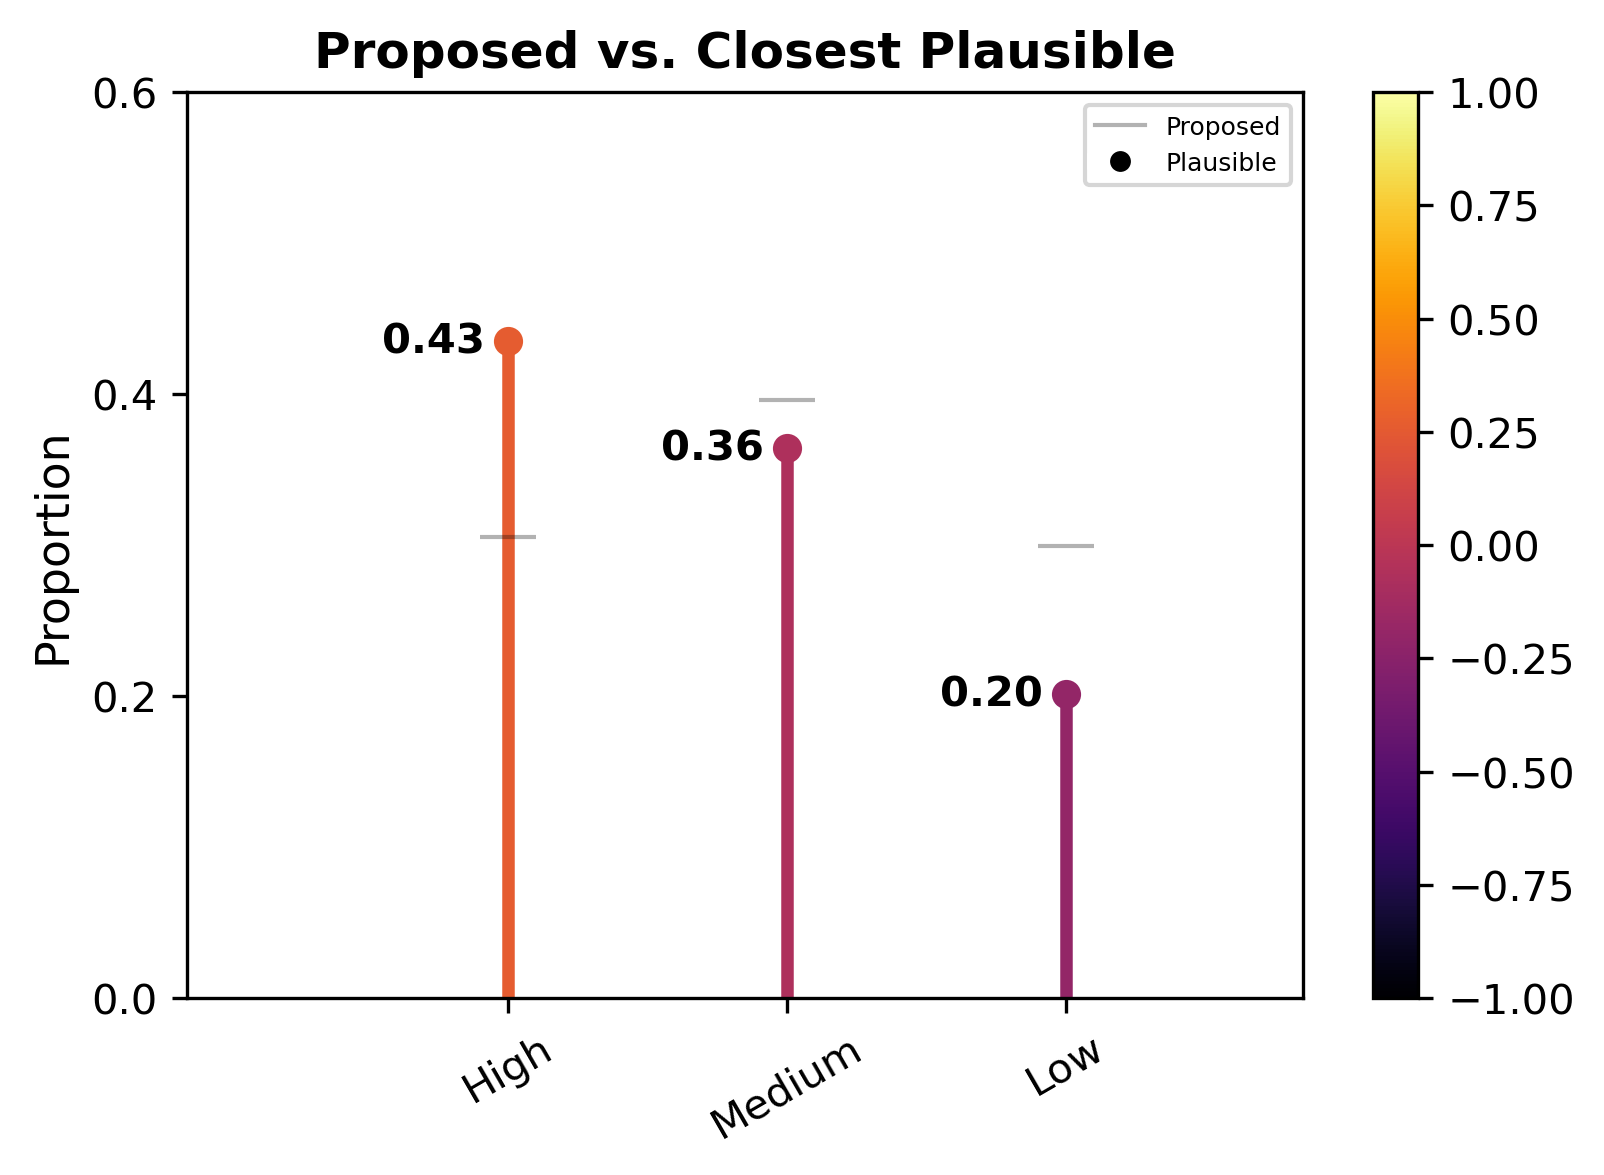

In [5]:
# >5 Priors test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(priors_gt5_races,priors_gt5_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_gt5priors_white_dist.pdf")